In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit.Chem import MCS
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd
import seaborn as sns


#descriptor
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcNumHBD
from rdkit.Chem.rdMolDescriptors import CalcNumHBA
from rdkit.Chem.rdMolDescriptors import CalcTPSA

import matplotlib.pyplot as plt

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  after removing the cwd from sys.path.

Bad key savefig.frameon in file C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo i

In [2]:
data= pd.read_excel('tinib_139_after_preprocess_1.xlsx')

In [3]:
#data = pd.read_csv('tinib_139.txt')

In [4]:
smiles_list=data['smiles']

In [5]:
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

In [6]:
result=[]
for i in  range(len(mol_list)) :
    try:
        Chem.QED.properties(mol_list[i])
        result.append(True)
    except:
        result.append(False)

In [7]:
data['result']=result

In [8]:
data1=data[result]

In [9]:
data2=data1.reset_index(drop=True)

In [10]:
data2

,Unnamed: 0,smiles,result
0,0,C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...,True
1,1,c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...,True
2,2,c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O,True
3,3,N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...,True
4,4,n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1,True
...,...,...,...
2751,2751,c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...,True
2752,2752,C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...,True
2753,2753,c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...,True
2754,2754,C1(C)CN(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)...,True


In [11]:
del data2['Unnamed: 0']

In [12]:
del data2['result']

In [13]:
data2

,smiles
0,C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...
1,c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...
2,c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O
3,N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...
4,n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1
...,...
2751,c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...
2752,C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...
2753,c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...
2754,C1(C)CN(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)...


In [14]:
smiles_list2=data2['smiles']

In [15]:
#smiles_list2.to_csv("smiles2.txt",index=False)

In [16]:
mol_list2=[]
for smiles in smiles_list2:
    mol=Chem.MolFromSmiles(smiles)
    mol_list2.append(mol)

In [17]:
MW=[]
for smiles in mol_list2:
    mol=ExactMolWt(smiles)
    MW.append(mol)

In [18]:
LogP=[]
for smiles in mol_list2:
    mol=MolLogP(smiles)
    LogP.append(mol)

In [19]:
HBD=[]
for smiles in mol_list2:
    mol=CalcNumHBD(smiles)
    HBD.append(mol)

In [20]:
HBA=[]
for smiles in mol_list2:
    mol=CalcNumHBA(smiles)
    HBA.append(mol)

In [21]:
TPSA=[]
for smiles in mol_list2:
    mol=CalcTPSA(smiles)
    TPSA.append(mol)

In [22]:
HBAD=[]
for smiles in mol_list2:
    mol=CalcNumHBD(smiles)+CalcNumHBA(smiles)
    HBAD.append(mol)

In [23]:
rota=[]
for smiles in mol_list2:
    mol=rdMolDescriptors.CalcNumRotatableBonds(smiles)
    rota.append(mol)

In [24]:
#data1.to_csv("test.txt",index=False,sep="\t")

<AxesSubplot:ylabel='Count'>

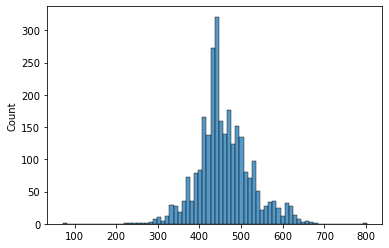

In [25]:
sns.histplot(MW)

Text(0.5, 1.0, 'HBA+HBD')

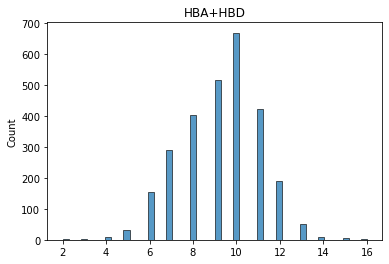

In [39]:
sns.histplot(HBAD).set_title('HBA+HBD')

Text(0.5, 1.0, 'rotatable bond')

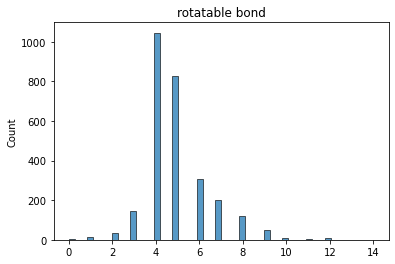

In [38]:
sns.histplot(rota).set_title('rotatable bond')

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'TPSA')

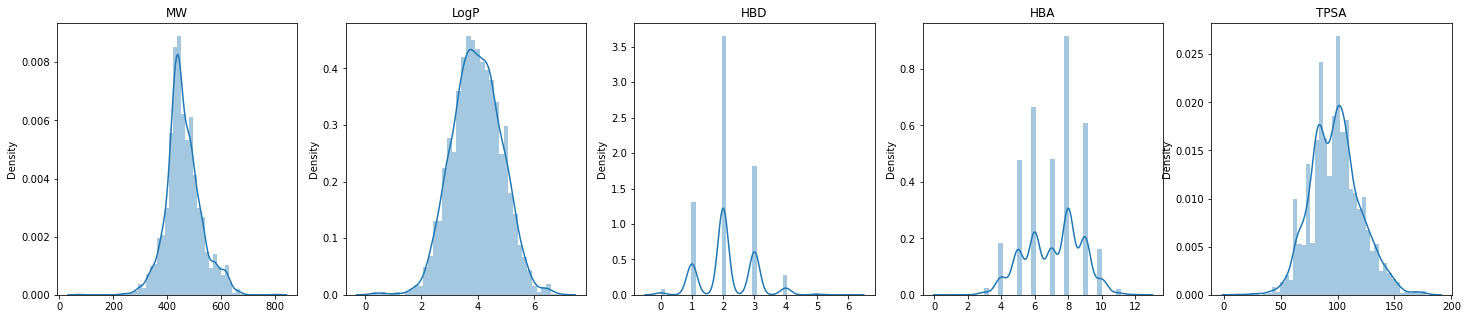

In [28]:
fig, ax = plt.subplots(ncols=5,figsize=(25, 5))
sns.distplot(MW,ax=ax[0])
ax[0].set_title('MW')

sns.distplot(LogP,ax=ax[1])
ax[1].set_title('LogP')

sns.distplot(HBD,ax=ax[2])
ax[2].set_title('HBD')

sns.distplot(HBA,ax=ax[3])
ax[3].set_title('HBA')

sns.distplot(TPSA,ax=ax[4])
ax[4].set_title('TPSA')
#plt.show()



In [29]:
data2['MW']=MW
data2['LogP']=LogP
data2['HBA']=HBA
data2['HBD']=HBD
data2['TPSA']=TPSA
data2['HBA_HBD']=HBAD
data2['rotational bond']=rota

In [30]:
data2

,smiles,MW,LogP,HBA,HBD,TPSA,HBA_HBD,rotational bond
0,C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...,407.268511,4.58970,5,3,106.92,8,4
1,c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...,442.259343,4.42140,8,2,83.79,10,5
2,c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O,450.007655,2.40610,5,3,87.66,8,4
3,N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...,456.238608,3.58702,8,2,100.86,10,4
4,n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1,414.228043,3.78020,8,2,93.44,10,5
...,...,...,...,...,...,...,...,...
2751,c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...,475.163138,3.09660,6,3,104.37,9,4
2752,C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...,442.259343,4.42140,8,2,83.79,10,4
2753,c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...,457.172560,2.95750,6,3,104.37,9,4
2754,C1(C)CN(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)...,456.177311,4.26630,5,2,78.35,7,4


In [31]:
filter1=data2['MW']>=300
filter2=data2['MW']<=700
filter3=data2['LogP']>=2.0
filter4=data2['LogP']<=6.0
filter5=data2['HBD']>=2.0
filter6=data2['HBD']<=6.0
filter7=data2['HBA']>=0
filter8=data2['HBA']<=12.0
filter9=data2['HBA_HBD']<=14.0
filter10=data2['TPSA']>=60.0
filter11=data2['TPSA']<=140.0
filter12=data2['rotational bond']<=12.0
totalfilter=filter1&filter2&filter3&filter4&filter5&filter6&filter7&filter8&filter9&filter10&filter11&filter12

In [32]:
data3=data2[totalfilter]

In [33]:
data3=data3.reset_index(drop=True)

In [34]:
data3

,smiles,MW,LogP,HBA,HBD,TPSA,HBA_HBD,rotational bond
0,C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...,407.268511,4.58970,5,3,106.92,8,4
1,c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...,442.259343,4.42140,8,2,83.79,10,5
2,c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O,450.007655,2.40610,5,3,87.66,8,4
3,N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...,456.238608,3.58702,8,2,100.86,10,4
4,n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1,414.228043,3.78020,8,2,93.44,10,5
...,...,...,...,...,...,...,...,...
2061,Fc1ccc(C)c(F)c1-c1nc(C(=O)Nc2cnccc2C2CC(N)CC(C...,442.163889,5.27492,5,2,80.90,7,4
2062,c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...,475.163138,3.09660,6,3,104.37,9,4
2063,C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...,442.259343,4.42140,8,2,83.79,10,4
2064,c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...,457.172560,2.95750,6,3,104.37,9,4
